In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute



# import basic plot tools
from qiskit.tools.visualization import plot_histogram

provider = IBMQ.load_account()

C:\Users\ssha9\Anaconda3\lib\site-packages\qiskit\providers\models\backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


In [2]:
backends = provider.backends()

In [3]:
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

qo = QuantumCircuit(q, c)

In [5]:
qo.ry(math.pi/2,q[0])
qo.ry(math.pi*2/3,q[1])
qo.cx(q[0],q[1])

qo.measure(q[0],c[0])
qo.measure(q[1],c[1])

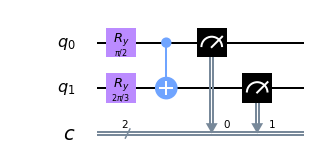

In [6]:
qo.draw(output="mpl")

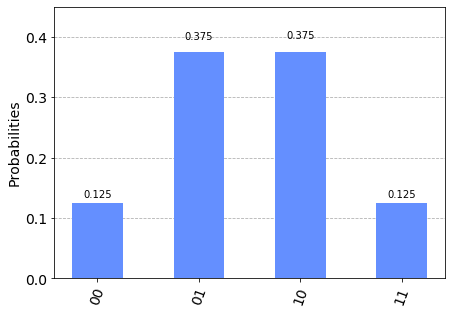

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000000
results = execute(qo, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [8]:
exact_answer = (answer['00']*0 + answer['01']*1 + answer['10']*2**2 + answer['11']*3**2)/shots
exact_answer

3.00242

# A_operator with too many shots

In [198]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')

cost = 0.001
qo = QuantumCircuit(q, c)

qo.ry(math.pi/2,q[0])
qo.ry(math.pi*2/3,q[1])
qo.cx(q[0],q[1])

qo.barrier(q[0:3])

qo.cry(4*1*np.sqrt(cost),q[0],q[2])
qo.cry(2*1*np.sqrt(cost),q[1],q[2])

qo.barrier(q[0:3])

#qo.h(q[0:3])
qo.cx(q[0],q[1])
qo.ry(-math.pi*2/3,q[1])
qo.ry(-math.pi/2,q[0])
qo.h(q[2])

qo.x(q[0:3])
qo.h(q[2])
qo.ccx(q[0],q[1],q[2])
qo.h(q[2])
qo.x(q[0:3])

qo.ry(math.pi/2,q[0])
qo.ry(math.pi*2/3,q[1])
qo.cx(q[0],q[1])
#qo.h(q[0:3])
qo.h(q[2])

qo.barrier(q[0:3])

qo.measure(q[2],c[0])

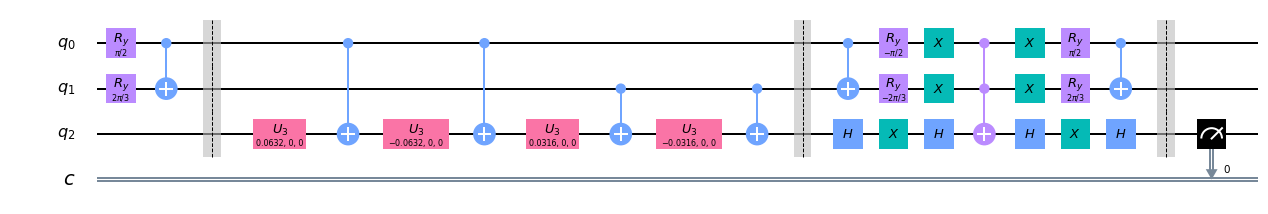

In [199]:
qo.draw(output="mpl")

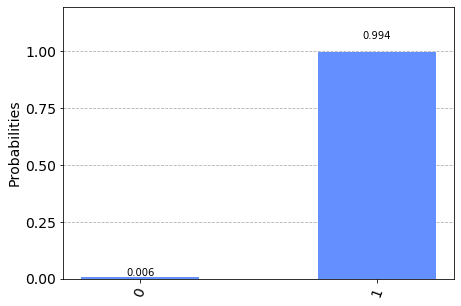

In [229]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
results = execute(qo, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [230]:
probability = answer['1']/shots
np.sqrt(probability)
#Approximate_answer = probability/cost

0.9969954864491614

In [221]:
print('Exact value:    \t%.4f' % exact_answer)
print('Estimated value:\t%.4f' % Approximate_answer)

Exact value:    	3.0024
Estimated value:	995.0000
